In [16]:
#%% Modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

In [17]:
#%% Functions
def u1(y1, y2): 
    return y1*y2 - 1./3. * (y1)**3

def u2(y2, y1): # note the order!
    return y1*y2 - (y2)**2

def u(y): 
    assert y.size == 2 
    y1, y2 = y
    return u1(y1,y2) + u2(y2,y1)

y0 = np.array([0.5,0.5])

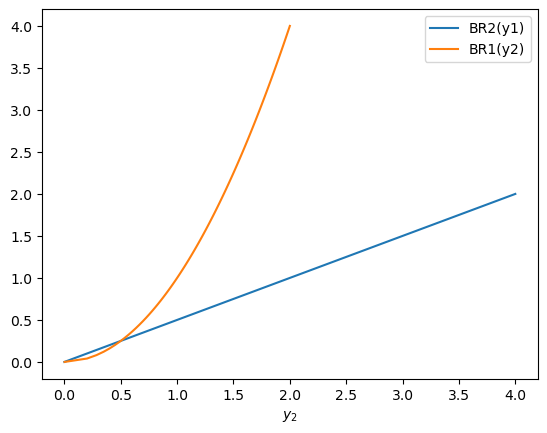

In [18]:
##NASH
# The Nash equilibrium is found where both players are best responding to each other. 
# We write the best response functions as numerical functions here; then we can re-use 
# them in other settings too 
def BR2(y1): 
    f = lambda y2 : -u2(y2=y2,y1=y1)
    res = minimize(f, y0[1])
    y2 = res.x
    return y2
    
def BR1(y2):
    f = lambda y1 : -u1(y1=y1,y2=y2)
    res = minimize(f, y0[0])
    y1 = res.x
    return y1

yy = np.linspace(0., 4., 100)
yy1 = np.empty(yy.shape)
yy2 = np.empty(yy.shape)
for i,y in enumerate(yy): 
    yy1[i] = BR1(y)
    yy2[i] = BR2(y)

plt.plot(yy, yy2, label=f'BR2(y1)')
plt.plot(yy1, yy, label=f'BR1(y2)')
plt.legend(); 
plt.xlabel('$y_1$');
plt.xlabel('$y_2$');

In [19]:
   #%% Iterated Bast Response
# Not always guaranteed to converge, but when it does we know that we have a Nash equilibrium. 
# we set a max number of iterations to avoid infinite loops
def IBR(y0:np.ndarray, maxit=100, tol=1e-5) -> np.ndarray: 
    y1,y2 = y0 
    success = False

    for it in range(maxit): 
        y1_ = y1*1.
        y2_ = y2*1.

        y1 = BR1(y2)
        y2 = BR2(y1)

        if (np.abs(y1-y1_).max() < 1e-6) and (np.abs(y2-y2_).max() < 1e-6):
            print(f'IBR successful after {it} iterations')
            break 

    if not success: 
        print(f'IBR failed after {it} iterations')

    return np.array([y1,y2])

yNE = IBR(y0)
print(f'yNE = {yNE}')

IBR successful after 16 iterations
IBR failed after 16 iterations
yNE = [[0.5 ]
 [0.25]]


In [23]:
# %% Sequential


def u1_of_BR2(y1: float) -> float: 
    y2 = BR2(y1)
    return u1(y1,y2)

yy_ = np.linspace(0,4.,10)
uu = np.empty(yy.shape)
for i,y in enumerate(yy): 
    uu[i] = u1_of_BR2(y)

f = lambda y1 : -u1_of_BR2(y1)
res = minimize(f, y0[0], method='SLSQP', options={'maxiter':1e3})
y1 = res.x

ySEQ = np.array([y1, BR2(y1)])
print(f'Sequential: {ySEQ.round(3)}')

Sequential: [[0.998]
 [0.499]]


SO: [2. 2.]


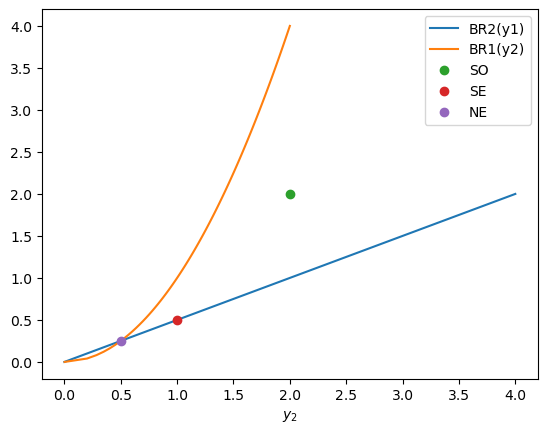

In [26]:
# %% Social optimum
# This occurs when we maximize the sum of the two players' utilities wrt. both their choices
y0 = np.array([0.5, 0.5])
f = lambda y : -u(y)
res = minimize(f, y0, method='SLSQP', options={'maxiter':1e3})
ySO = res.x
print(f'SO: {ySO.round(3)}')

plt.plot(yy, yy2, label=f'BR2(y1)')
plt.plot(yy1, yy, label=f'BR1(y2)')
plt.plot(ySO[0], ySO[1], 'o', label='SO')
plt.plot(ySEQ[0], ySEQ[1], 'o', label='SE')
plt.plot(yNE[0], yNE[1], 'o', label='NE')
plt.legend(); 
plt.xlabel('$y_1$');
plt.xlabel('$y_2$');

